In [7]:
pip install openpyxl


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip3.13 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data=pd.read_excel('CO2_Data.xlsx')

In [11]:
data.describe()

,Country Name,Country Code,Series Name,Series Code,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
count,2662,2660,2660,2660,2660,2660,2660,2660,2660,2660,2660,2660,2660,2660
unique,268,266,10,10,2152,2138,2152,2152,2147,2149,2150,2129,1905,1845
top,World,WLD,Carbon dioxide (CO2) emissions (total) excludi...,EN.GHG.CO2.ZG.AR5,..,..,..,..,..,..,..,..,..,..
freq,10,10,266,266,391,392,393,393,393,393,398,405,638,691


In [12]:
data.columns

Index(['Country Name', 'Country Code',  'Series Name',  'Series Code',
                 2014,           2015,           2016,           2017,
                 2018,           2019,           2020,           2021,
                 2022,           2023],
      dtype='object')

In [13]:
data.shape

(2665, 14)

In [14]:
# Remove rows where 'Series Name' is "Carbon dioxide (CO2) emissions (total) excluding LULUCF (% change from 1990)"
data = data[data["Series Name"] != "Carbon dioxide (CO2) emissions (total) excluding LULUCF (% change from 1990)"]
data.shape

(2399, 14)

In [ ]:
#I will keep only 21 countries (Top 10 biggest contributors to global CO2 emissions, different regions’ contributions to CO2 emissions and 
#economic development affects CO2 emissions(High-income,middle-income and low-income).
# List of selected 21 countries
selected_countries = [
    "China", "United States", "India", "Russia", "Japan", "Germany", "Iran", "Saudi Arabia",
    "Canada", "Brazil", "Mexico", "Argentina", "United Kingdom", "France",
    "South Africa", "Nigeria", "Egypt", "Australia", "New Zealand", "Bangladesh"
]
data_filtered = data[data["Country Name"].isin(selected_countries)]
data_filtered.to_excel("CO2_21countries.xlsx")
print("Done")

Done


In [17]:
data=pd.read_excel('CO2_21countries.xlsx')
data.shape

(153, 15)

In [19]:
#The analysis will focus on total CO2 emissions, CO2 per capita, and economic indicators (GDP, income levels, etc.) 
#rather than sector-wise emissions like "CO2 from Waste."
#I will just keep 3 Series:
#Carbon dioxide (CO2) emissions excluding LULUCF per capita (t CO2e/capita)
#Total greenhouse gas emissions excluding LULUCF (Mt CO2e)
#Carbon intensity of GDP (kg CO2e per 2021 PPP $ of GDP)
# List of columns to keep
selected_series = [
    "Carbon dioxide (CO2) emissions excluding LULUCF per capita (t CO2e/capita)",
    "Total greenhouse gas emissions excluding LULUCF (Mt CO2e)",
    "Carbon intensity of GDP (kg CO2e per 2021 PPP $ of GDP)"
]
df_filtered = data[data["Series Name"].isin(selected_series)]
print("Flitering is complete")

Flitering is complete


In [20]:
df_filtered.shape

(51, 15)

In [21]:
df_filtered.describe()

,Unnamed: 0
count,51.000000
mean,961.313725
std,673.599361
min,71.000000
25%,351.500000
50%,892.000000
75%,1445.000000
max,2068.000000


In [22]:
print(df_filtered.info())
print(df_filtered.head())

<class 'pandas.core.frame.DataFrame'>
Index: 51 entries, 0 to 151
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    51 non-null     int64 
 1   Country Name  51 non-null     object
 2   Country Code  51 non-null     object
 3   Series Name   51 non-null     object
 4   Series Code   51 non-null     object
 5   2014          51 non-null     object
 6   2015          51 non-null     object
 7   2016          51 non-null     object
 8   2017          51 non-null     object
 9   2018          51 non-null     object
 10  2019          51 non-null     object
 11  2020          51 non-null     object
 12  2021          51 non-null     object
 13  2022          51 non-null     object
 14  2023          51 non-null     object
dtypes: int64(1), object(14)
memory usage: 6.4+ KB
None
    Unnamed: 0 Country Name Country Code  \
0           71    Argentina          ARG   
1           72    Argentina          ARG   

In [25]:
print(df_filtered.columns)

Index(['Country Name', 'Country Code',  'Series Name',  'Series Code',
                 2014,           2015,           2016,           2017,
                 2018,           2019,           2020,           2021,
                 2022,           2023],
      dtype='object')


In [26]:
# Convert all year columns (2014–2023) to numeric
year_columns = [2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]
df_filtered[year_columns] = df_filtered[year_columns].apply(pd.to_numeric, errors='coerce')

# Check if the conversion was successful
print(df_filtered.info())

<class 'pandas.core.frame.DataFrame'>
Index: 51 entries, 0 to 151
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Name  51 non-null     object 
 1   Country Code  51 non-null     object 
 2   Series Name   51 non-null     object 
 3   Series Code   51 non-null     object 
 4   2014          51 non-null     float64
 5   2015          51 non-null     float64
 6   2016          51 non-null     float64
 7   2017          51 non-null     float64
 8   2018          51 non-null     float64
 9   2019          51 non-null     float64
 10  2020          51 non-null     float64
 11  2021          51 non-null     float64
 12  2022          51 non-null     float64
 13  2023          51 non-null     float64
dtypes: float64(10), object(4)
memory usage: 6.0+ KB
None


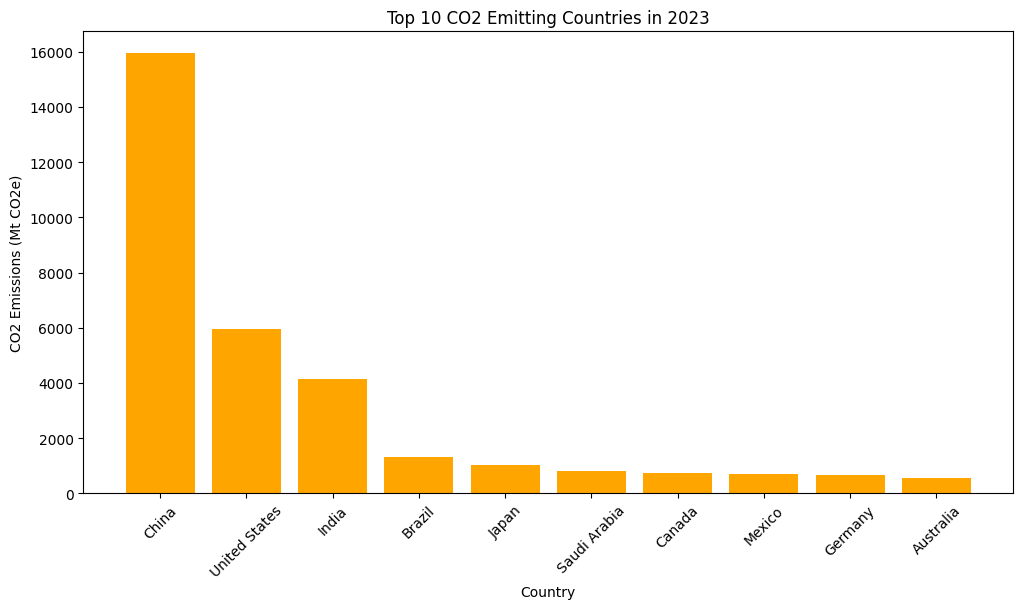

In [28]:
#Analyzing the top 10 CO2 emitting countries

# Filter dataset to include only "Total greenhouse gas emissions excluding LULUCF (Mt CO2e)"
co2_data = df_filtered[df_filtered["Series Name"] == "Total greenhouse gas emissions excluding LULUCF (Mt CO2e)"]

# Sort by 2023 emissions in descending order
top10_countries = co2_data[["Country Name", 2023]].sort_values(by=2023, ascending=False).head(10)

# Display top 10 emitters
import matplotlib.pyplot as plt

# Bar chart for visualization
plt.figure(figsize=(12, 6))
plt.bar(top10_countries["Country Name"], top10_countries[2023], color="orange")
plt.xlabel("Country")
plt.ylabel("CO2 Emissions (Mt CO2e)")
plt.title("Top 10 CO2 Emitting Countries in 2023")
plt.xticks(rotation=45)
plt.show()

In [ ]:
#Insights

#China is by far the largest emitter, with emissions much higher than any other country.
#The U.S. and India follow, but their emissions are significantly lower than China’s.
#The remaining seven countries contribute much smaller amounts, showing a steep drop after the top three emitters.

/var/folders/br/ng89_vjs55b9fqgsky6n1_9m0000gn/T/ipykernel_6007/3798388545.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  co2_data["Region"] = co2_data["Country Name"].map(region_mapping)


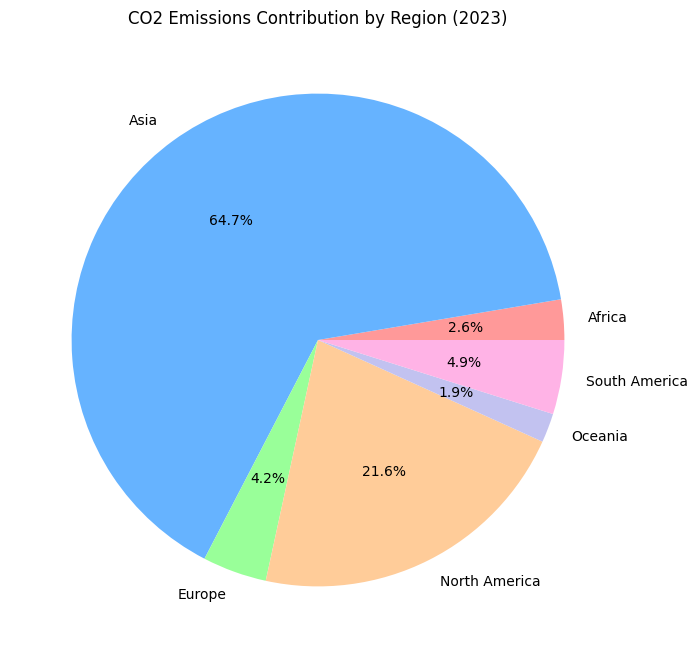

In [38]:
#Comparing Regional CO2 Contributions
region_mapping = {
    "China": "Asia", "India": "Asia", "Japan": "Asia", "Iran": "Asia", "Saudi Arabia": "Asia", "Bangladesh": "Asia",
    "United States": "North America", "Canada": "North America", "Mexico": "North America",
    "Brazil": "South America", "Argentina": "South America",
    "South Africa": "Africa", "Nigeria": "Africa", "Egypt": "Africa",
    "Germany": "Europe", "United Kingdom": "Europe", "France": "Europe",
    "Australia": "Oceania", "New Zealand": "Oceania"
}

# Filter data for "Total greenhouse gas emissions excluding LULUCF (Mt CO2e)"
co2_data = df_filtered[df_filtered["Series Name"] == "Total greenhouse gas emissions excluding LULUCF (Mt CO2e)"]

# Create a new column for region
co2_data["Region"] = co2_data["Country Name"].map(region_mapping)

# Group by region and sum CO2 emissions
region_totals = co2_data.groupby("Region")[2023].sum()

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(region_totals, labels=region_totals.index, autopct='%1.1f%%', colors=["#ff9999", "#66b3ff", "#99ff99", "#ffcc99", "#c2c2f0", "#ffb3e6"])
plt.title("CO2 Emissions Contribution by Region (2023)")
plt.show()


In [ ]:
#Insights

#Asia is the dominant CO2 emitter at ~64.7% of global emissions.
#Because of Rapid industrialization in China & India. Large populations and high energy consumption.

#North America follows with 21.6%, significantly lower but still a major contributor.

#Europe only contributes ~4.2%, despite being industrialized.
#Could be due to strong climate policies & renewable energy use.

#Africa (2.6%), South America (4.9%), and Oceania (1.9%) contribute the least.
#Possibly due to lower industrial activity & energy consumption.

In [30]:
print(df_filtered["Series Name"].unique())


['Carbon dioxide (CO2) emissions excluding LULUCF per capita (t CO2e/capita)'
 'Total greenhouse gas emissions excluding LULUCF (Mt CO2e)'
 'Carbon intensity of GDP (kg CO2e per 2021 PPP $ of GDP)']


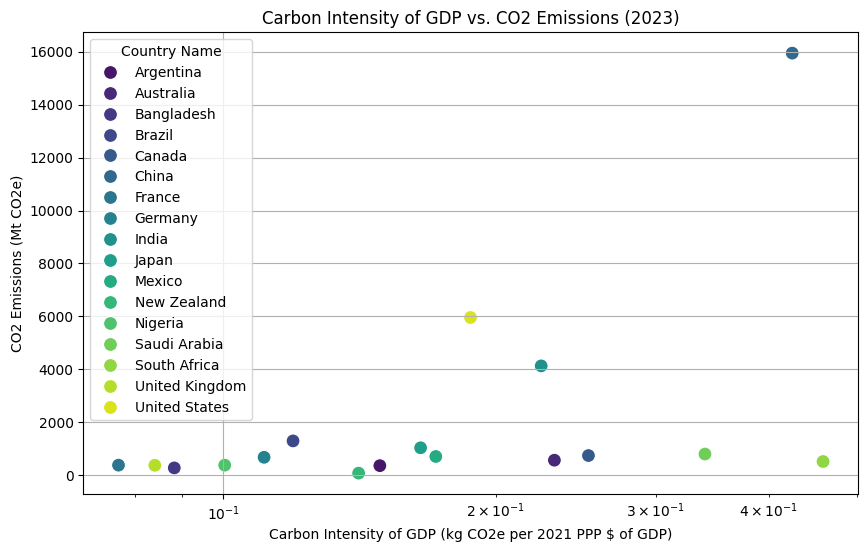

In [31]:
#Analyzing Economic Development vs. CO2 Emissions 

# Extract CO2 emissions data
co2_data = df_filtered[df_filtered["Series Name"] == "Total greenhouse gas emissions excluding LULUCF (Mt CO2e)"]
co2_data = co2_data[["Country Name", 2023]].rename(columns={2023: "CO2 Emissions"})

# Extract Carbon Intensity of GDP data
carbon_intensity_data = df_filtered[df_filtered["Series Name"] == "Carbon intensity of GDP (kg CO2e per 2021 PPP $ of GDP)"]
carbon_intensity_data = carbon_intensity_data[["Country Name", 2023]].rename(columns={2023: "Carbon Intensity of GDP"})

# Merge datasets
merged_data = co2_data.merge(carbon_intensity_data, on="Country Name")

# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_data, x="Carbon Intensity of GDP", y="CO2 Emissions", hue="Country Name", palette="viridis", s=100)
plt.xscale("log")  # Log scale for better visualization
plt.xlabel("Carbon Intensity of GDP (kg CO2e per 2021 PPP $ of GDP)")
plt.ylabel("CO2 Emissions (Mt CO2e)")
plt.title("Carbon Intensity of GDP vs. CO2 Emissions (2023)")
plt.grid(True)
plt.show()

In [ ]:
#Insight

#China (far right, top) --> Extremely high CO2 emissions but also higher carbon intensity (likely due to coal-based energy).
#United States (mid-right) --> High emissions but lower carbon intensity than China (more efficient economy).
#European countries (e.g., UK, France, Germany) --> Lower emissions & low carbon intensity (strong green energy policies).
#Developing countries (e.g., Bangladesh, Nigeria) --> Lower total emissions but varying carbon intensity (different energy sources).

In [35]:
# Get top 3 CO2 emitting countries dynamically
top_emitters = df_filtered[df_filtered["Series Name"] == "Total greenhouse gas emissions excluding LULUCF (Mt CO2e)"]
top_emitters = top_emitters[["Country Name", 2023]].sort_values(by=2023, ascending=False).head(3)

# Generate dynamic insights
top_countries = top_emitters["Country Name"].tolist()
top_emissions = top_emitters[2023].tolist()

top_emitters_insight = f"""## 🌍 Global CO2 Emissions Overview
- **{top_countries[0]}** is by far the largest emitter, with emissions reaching {top_emissions[0]:,.0f} Mt CO2e.
- **{top_countries[1]}** and **{top_countries[2]}** follow, but their emissions are significantly lower than {top_countries[0]}.
- The emissions gap between {top_countries[0]} and other countries highlights the heavy reliance on industrial energy use in high-emission nations.
"""

In [40]:
# Aggregate emissions by region
region_totals = co2_data.groupby("Region")[2023].sum().sort_values(ascending=False)

# Identify highest and lowest emitting regions
highest_region = region_totals.idxmax()
lowest_region = region_totals.idxmin()

# Generate dynamic insights
regional_insight = f"""## 🌎 Regional CO2 Contributions
- **{highest_region}** is the leading CO2-emitting region, contributing approximately {region_totals.max():,.0f} Mt CO2e.
- **{lowest_region}** has the lowest emissions, emitting only {region_totals.min():,.0f} Mt CO2e.
- Differences in emissions between regions are largely due to industrialization levels and energy sources.
"""

In [41]:
# Identify highest and lowest carbon intensity countries
high_intensity = merged_data.sort_values(by="Carbon Intensity of GDP", ascending=False).iloc[0]
low_intensity = merged_data.sort_values(by="Carbon Intensity of GDP", ascending=True).iloc[0]

co2_intensity_insight = f"""## 📈 CO2 Emissions vs. Economic Development
- **{high_intensity['Country Name']}** has the highest carbon intensity of GDP ({high_intensity['Carbon Intensity of GDP']:.2f} kg CO2e per $1 GDP), indicating heavy reliance on fossil fuels.
- **{low_intensity['Country Name']}** has the lowest carbon intensity ({low_intensity['Carbon Intensity of GDP']:.2f} kg CO2e per $1 GDP), suggesting strong energy efficiency and renewables use.
"""

In [42]:
#Auto-Generate Recommendations

recommendations = f"""# Recommendations

## 🌱 1. Renewable Energy Transition
- High-intensity countries like **{high_intensity['Country Name']}** should focus on **solar, wind, and hydro energy** adoption to cut emissions.

## ⚖ 2. Strengthening Climate Policies
- **{top_countries[0]}, {top_countries[1]}, and {top_countries[2]}** should implement stricter carbon pricing and emissions reduction policies.

## 🚀 3. Investing in Energy Efficiency
- Countries with high emissions should upgrade **manufacturing & transportation infrastructure** to reduce energy waste.

## 🌍 4. Global Collaboration
- More financial and technological support should be provided to **{lowest_region}** to help transition to sustainable energy.
"""


In [44]:
# Combine all insights
final_report = top_emitters_insight + "\n" + regional_insight + "\n" + co2_intensity_insight + "\n" + recommendations

# Save to file
file_path = "/Users/tph/Desktop/📝✨👩🏻‍💻/Projects/Global CO2 Emissions Dashboard/Auto_Generated_CO2_Insights.txt"
with open(file_path, "w", encoding="utf-8") as file:
    file.write(final_report)

print("✅ Auto-generated insights saved to:", file_path)


✅ Auto-generated insights saved to: /Users/tph/Desktop/📝✨👩🏻‍💻/Projects/Global CO2 Emissions Dashboard/Auto_Generated_CO2_Insights.txt
